## Ejemplo minimalista con tensorflow 2.0

### importamos librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Generamos datos ficticios

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)
#esto genera un archivo npz usado para trabajar con tensorflow
# ya que usa tensores que son archivos n-dimensionales

### Resolviendo con tensor flow

In [3]:
#primero cargamos los datos que creamos anteriormente
training_data = np.load('TF_intro.npz')

In [4]:
#ahoar definimos el tamaño de las variables de entradas y salidas
#tenemos 2 variables de entrada asi que
input_size = 2
#salida solo hay 1
output_size = 1

#ahora a diferencia de otros paquetes debemos construir nuestro modelo
#keras es el modelo sobre el que esta basado tf
#Sequential es la funcion que indica como se fijaran las reglas del modelo
#y requiere como argumento las capas de apilamiento
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
    #tense toma las entradas dadas al modelo y calcula el producto escalar de las
    #entradas y los pesos y suma el sesgo
])

#model compile debe tener como argumentos el optimizador y la perdida
#el optimizador que usaremos es DGE que es el desenso de gradiente estocastico
#en la documentacion de tf en la seccion de keras.optimizaers pordemos ver las diferentes opciones de optimizadores
#Para la perdida queremos hacer que este ejemplo esté tan cerca como sea posible a nuestro
#otro ejemplo minimo de numpy, asi que tenemos que usar la perdida de norma L-2,
#escalada por el numero de observaciones
model.compile(optimizer='sgd', loss='mean_squared_error')

#Época es el nombre que se les da a las iteraicones sobre todo el conjunto de datos en el aprendiazje automatico
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)


el resultado anterior <keras.src.callbacks.history.History at 0x1984b5b3750>
se muetra porque verbose=0 indica que queremos ejecutar el codigo en silencio, es decir, que no se muestren salidas al respecto pero que se conserve en memoria. 1 nos da mas información, 2 nos marca una linea por época

una forma de confirmar que nuestro algoritmo esta funcionando es comprobando la formula 2x - 3z + 5 + ruido
usando el metodo weights y usando la capa 0 para ver que los resultados se hacerquen a 2, -3 y 5

In [5]:
model.layers[0].get_weights()

[array([[ 2.0000005],
        [-2.9999995]], dtype=float32),
 array([5.007194], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0000005],
       [-2.9999995]], dtype=float32)

In [7]:
blas = model.layers[0].get_weights()[1]
blas

array([5.007194], dtype=float32)

### ahora vamos a predecir los valosres utilizando nuestro modelo

In [9]:
model.predict_on_batch(training_data['inputs']).round(1)#round nos deja solo un decimal
#lo que nos da los valores comparados con los valores objetivos para la funcion de perdida
#osea las salidas despues de nuestro modelo entrenado, es decir despues de 100 épocas de entrenamiento

array([[-16.2],
       [ -4.9],
       [-17. ],
       [  0.4],
       [-19.7],
       [-14.4],
       [ 27.1],
       [-14.9],
       [-32.8],
       [ -7.1],
       [-19.5],
       [ -6.5],
       [ 23. ],
       [ -1. ],
       [  9.1],
       [-16.1],
       [-26.9],
       [ 26.5],
       [  5.8],
       [ -2.7],
       [ 18. ],
       [ 40.3],
       [-14.1],
       [ -4.5],
       [  8.4],
       [ 17.1],
       [ 32.2],
       [  5.1],
       [  4. ],
       [ 16.1],
       [-20.5],
       [-11.6],
       [-22.3],
       [  0.8],
       [ -9.1],
       [ 28.1],
       [ 14.8],
       [ 17.2],
       [ 10. ],
       [ 10. ],
       [  8.4],
       [-14. ],
       [-26.2],
       [  8.4],
       [ 22.2],
       [ -8.6],
       [ -7.8],
       [-30.5],
       [ 13.5],
       [-18.4],
       [  1. ],
       [-16.7],
       [ 27.5],
       [ 36.8],
       [ -7.7],
       [ 16.9],
       [ 15.8],
       [ 23.9],
       [-10.3],
       [ -9.1],
       [-31.5],
       [ 23.9],
       [

In [10]:
training_data['targets'].round(1)

array([[-16.3, -15.7, -15.9, ..., -16.7, -15.9, -15.2],
       [ -5. ,  -4.4,  -4.5, ...,  -5.4,  -4.6,  -3.9],
       [-17.1, -16.5, -16.7, ..., -17.6, -16.7, -16.1],
       ...,
       [ 50.8,  51.4,  51.2, ...,  50.3,  51.2,  51.8],
       [-32.1, -31.5, -31.6, ..., -32.5, -31.7, -31. ],
       [ 13.7,  14.3,  14.1, ...,  13.2,  14.1,  14.7]])

## Graficquemos las salidas contra los objetivos

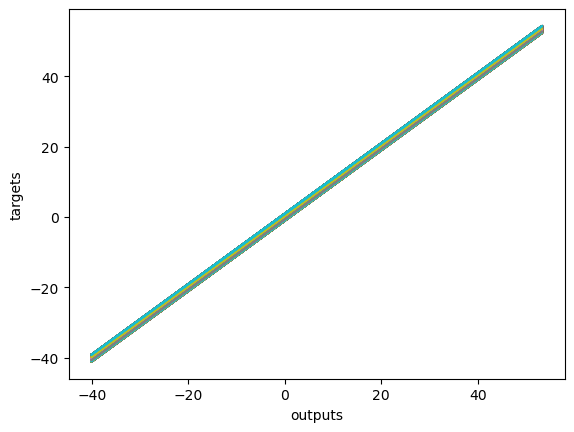

In [11]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()